In [309]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Базовая работа с изображением

In [310]:
image = cv2.imread('sar_2_color.jpg')

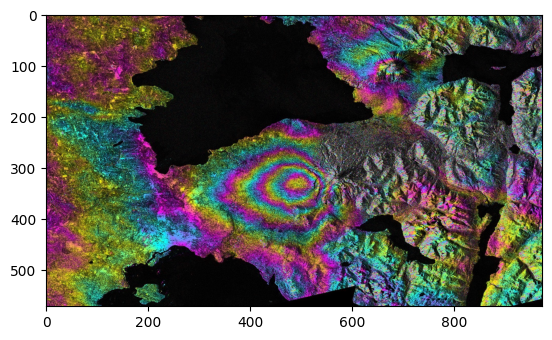

In [311]:
plt.imshow(image)


In [312]:
image.shape # h,w,c

(572, 974, 3)

In [313]:
image[250,250] # b,g,r

array([12, 12, 12], dtype=uint8)

In [314]:
# ROI
img_roi = image[100:200, 500:700]

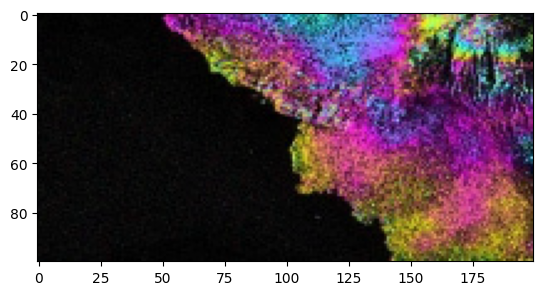

In [315]:
plt.imshow(img_roi)

In [316]:
b,g,r = cv2.split(image)

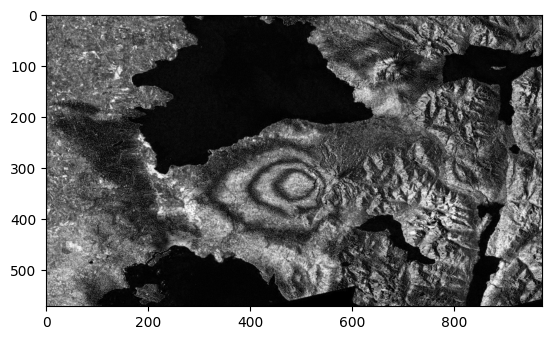

In [317]:
plt.imshow(b, cmap = 'gray')

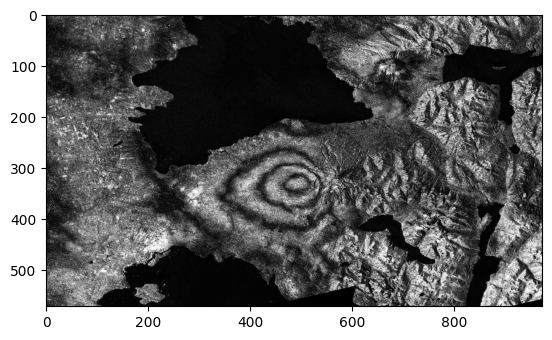

In [318]:
plt.imshow(g, cmap = 'gray')

In [319]:
b = image[:,:,0]

In [320]:
import copy

image2 = copy.deepcopy(image)

In [321]:
image2[50:100,50:100] = [0,0,0]

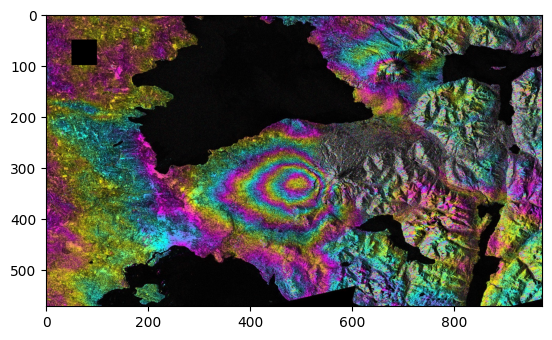

In [322]:
plt.imshow(image2)

In [323]:
# empty image
image_template = np.zeros(image.shape,np.uint8)

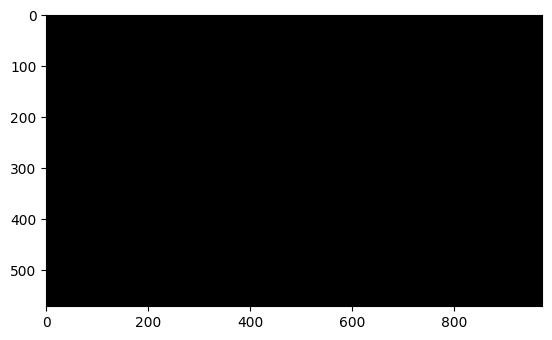

In [324]:
plt.imshow(image_template)

# Конвертация цветовых моделей

In [325]:
image_template[0,0]

array([0, 0, 0], dtype=uint8)

In [326]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [327]:
image_gray[0,0]

np.uint8(40)

In [328]:
image_gray.shape

(572, 974)

In [329]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 

In [330]:
image_hsv.shape

(572, 974, 3)

In [331]:
image_hsv[0,0]

array([117, 143,  75], dtype=uint8)

In [332]:
image[0,0]

array([75, 37, 33], dtype=uint8)

In [333]:
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [334]:
image_lab[0,0]

array([ 42, 139, 104], dtype=uint8)

# Пороговая фильтрация

In [335]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

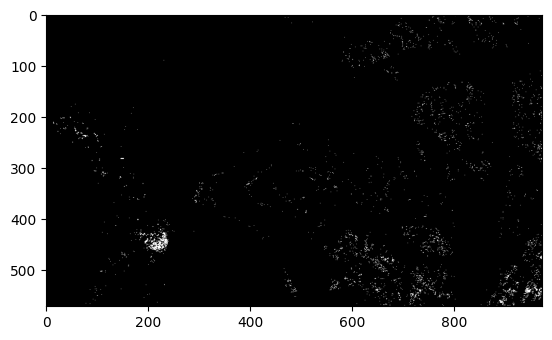

In [336]:
plt.imshow(thresh1, cmap='gray')

In [337]:
thresh1[thresh1==100].sum()

np.uint64(0)

# Построение гистограммы

In [338]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

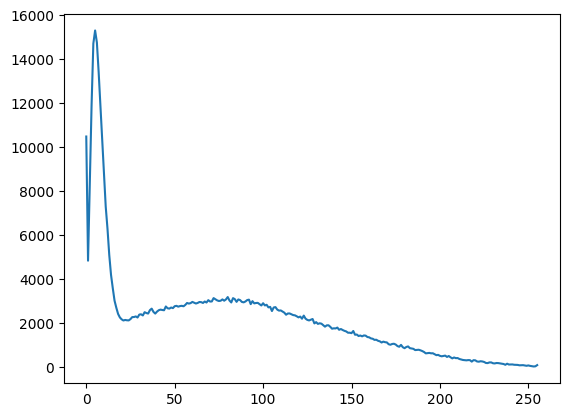

In [339]:
plt.plot(b_hist)

In [340]:
b_hist_cum = b_hist.cumsum()

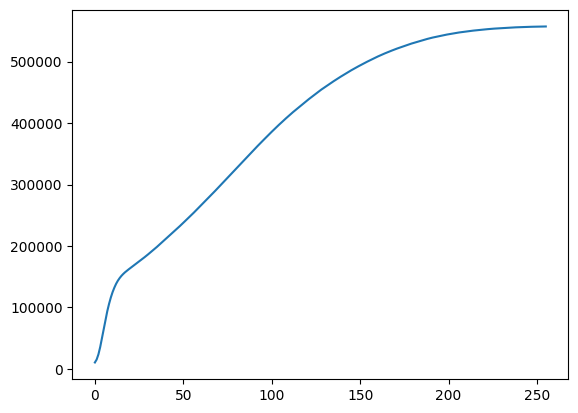

In [341]:
plt.plot(b_hist_cum)

In [342]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])

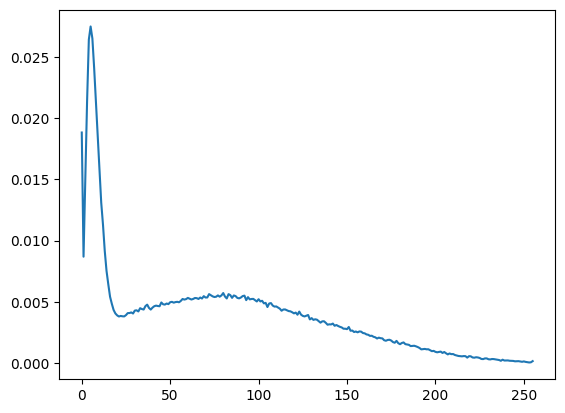

In [343]:
plt.plot(b_hist_norm)

# Сравнение двух изображений

In [344]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(image_gray, image_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 1.0


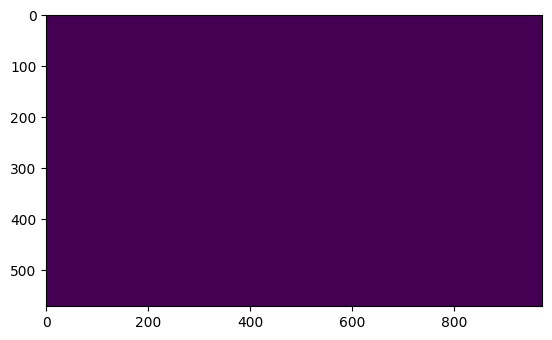

In [345]:
plt.imshow(diff)

In [346]:
mse = mean_squared_error(image_gray, image_gray)
mse

np.float64(0.0)

# Статистические характеристики изображений

In [347]:
mean = image_gray.mean()

In [348]:
std = image_gray.std()

In [349]:
print(mean,std)

67.41225535245043 52.016191875959635


In [350]:
eq_gray = cv2.equalizeHist(image_gray)

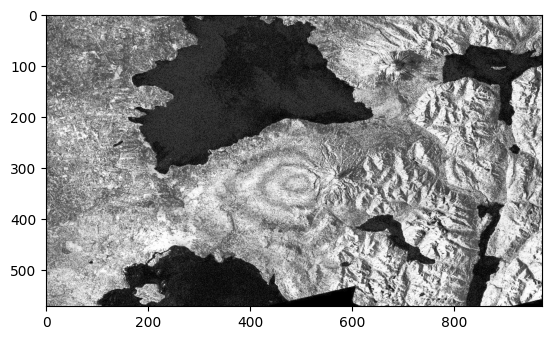

In [351]:
plt.imshow(eq_gray, cmap="gray")


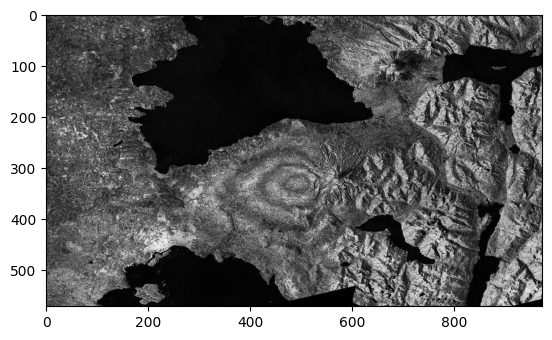

In [352]:
plt.imshow(image_gray, cmap="gray")

In [353]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. Постройте гистограмму
# 3. Реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. Реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат


### 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 

In [354]:
image3 = cv2.imread('sar_1_gray.jpg')

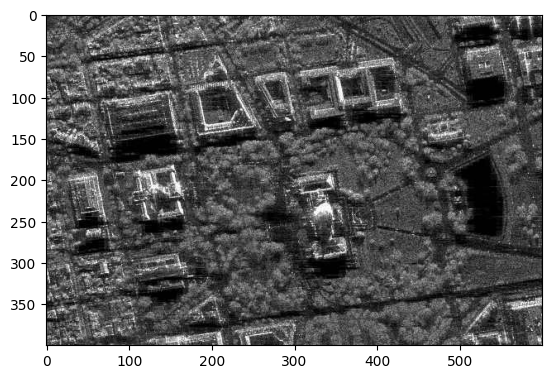

In [355]:
plt.imshow(image3)

### 2. Постройте гистограмму

In [356]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

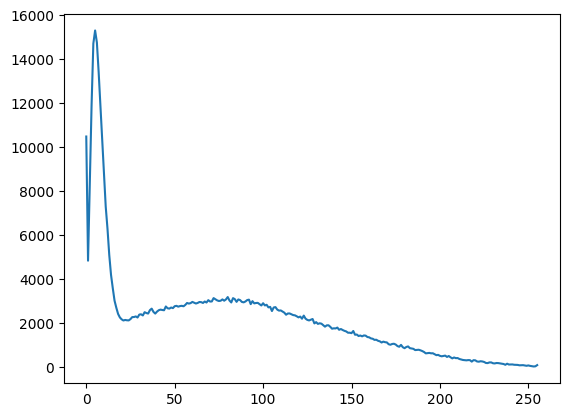

In [357]:
plt.plot(b_hist)

In [358]:
b_hist_cum = b_hist.cumsum()

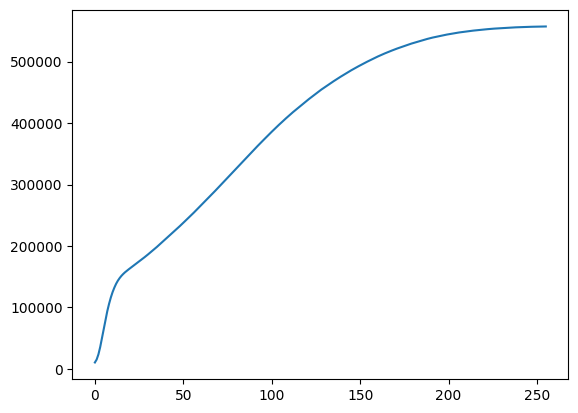

In [359]:
plt.plot(b_hist_cum)

In [360]:
b_hist_norm = b_hist /  (image3.shape[0] * image3.shape[1])

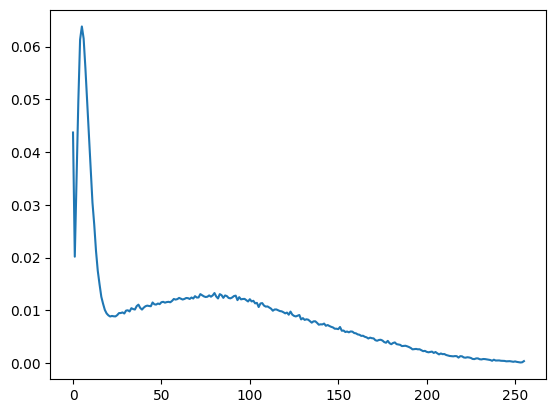

In [361]:
plt.plot(b_hist_norm)

### 3. Реализуйте алгоритм гамма коррекции с параметром гамма <1, 1>.

In [362]:
image4 = copy.deepcopy(image3)

In [363]:

gamma_low = 0.5
image_gamma_low = np.array(255 * (image4 / 255.0) ** gamma_low, dtype='uint8')
   

In [364]:
gamma_high = 1.5
image_gamma_high = np.array(255 * (image4 / 255.0) ** gamma_high, dtype='uint8')

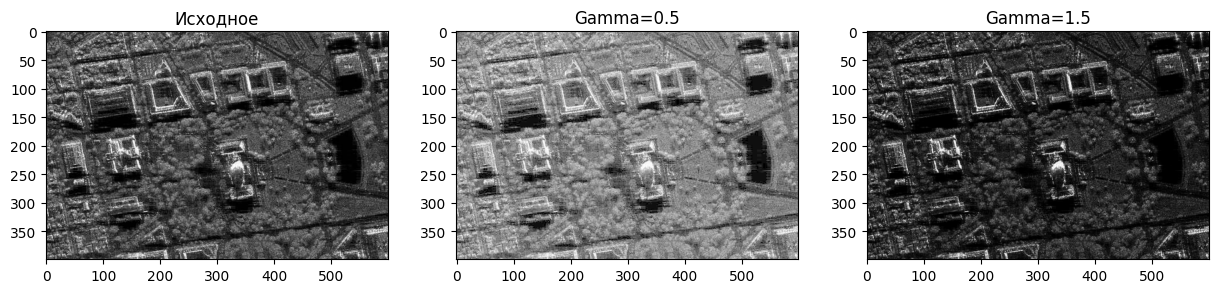

In [365]:


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image4)
plt.title("Исходное")

plt.subplot(1,3,2)
plt.imshow(image_gamma_low)
plt.title(f"Gamma={gamma_low}")

plt.subplot(1,3,3)
plt.imshow(image_gamma_high)
plt.title(f"Gamma={gamma_high}")

plt.show()

In [366]:
print("image4:", image4.shape)
print("image_gamma_low:", image_gamma_low.shape)

image4: (400, 600, 3)
image_gamma_low: (400, 600, 3)


### 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.

In [367]:
image4_gray = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY) 
image_gamma_low_gray = cv2.cvtColor(image_gamma_low, cv2.COLOR_BGR2GRAY) 

In [368]:
(ssim_low, diff_low) = structural_similarity(image4_gray, image_gamma_low_gray, full=True)
diff_low = (diff_low * 255).astype("uint8")

print("SSIM: {}".format(ssim_low))

SSIM: 0.7875008686792753


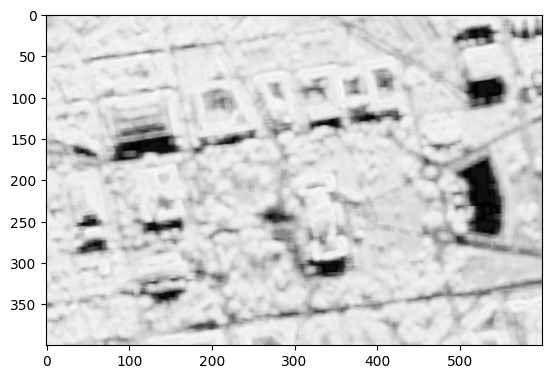

In [369]:
plt.imshow(diff_low, cmap='gray')

In [370]:
image_gamma_high_gray = cv2.cvtColor(image_gamma_high, cv2.COLOR_BGR2GRAY) 

In [371]:
(ssim_high, diff_high) = structural_similarity(image4_gray, image_gamma_high_gray, full=True)
diff_high = (diff_high * 255).astype("uint8")

print("SSIM: {}".format(ssim_high))

SSIM: 0.8065788107754002


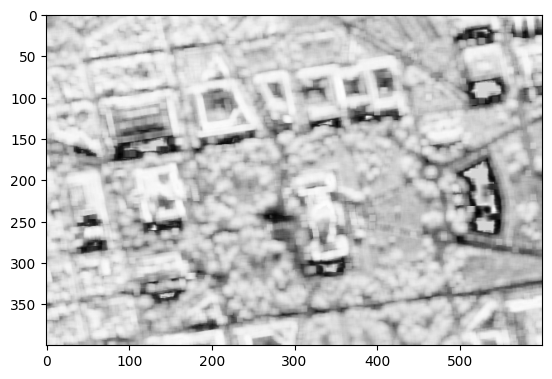

In [372]:
plt.imshow(diff_high, cmap='gray')

In [373]:
mse_low = mean_squared_error(image4_gray, image_gamma_low_gray)
mse_low

np.float64(3250.429145833333)

In [374]:
mse_high = mean_squared_error(image4_gray, image_gamma_high_gray)
mse_high

np.float64(971.8206541666667)

### 5. Реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.

In [375]:
eq_gray = cv2.equalizeHist(image4_gray)

67.41225535245043 52.016191875959635


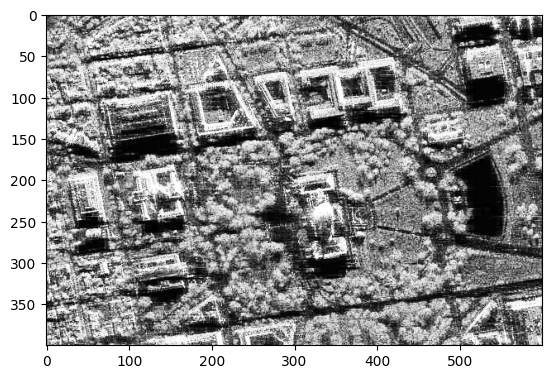

In [376]:
mean = image_gray.mean()
std = image_gray.std()
print(mean,std)
plt.imshow(eq_gray, cmap="gray")

mean_ref = eq_gray.mean()
std_ref = eq_gray.std()

In [377]:
mean_ref = eq_gray.mean()
std_ref = eq_gray.std()

mean_src = image4_gray.mean()
std_src = image4_gray.std()

In [378]:
print(mean_src, std_src)
print(mean_ref, std_ref)

74.94157083333333 43.658465466227916
127.02563333333333 74.26964841889017


In [379]:
image4_stat_corr = (image4_gray - mean_src) * (std_ref / std_src) + mean_ref
image4_stat_corr = np.clip(image4_stat_corr, 0, 255).astype(np.uint8)

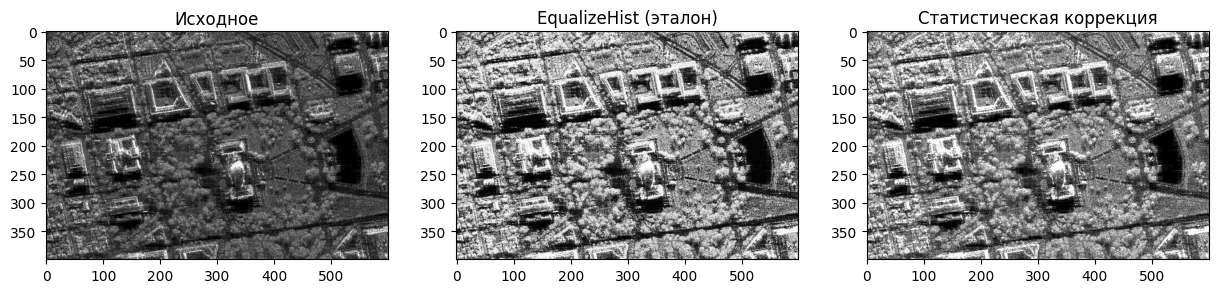

In [380]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image4_gray, cmap="gray")
plt.title("Исходное")

plt.subplot(1,3,2)
plt.imshow(eq_gray, cmap="gray")
plt.title("EqualizeHist (эталон)")

plt.subplot(1,3,3)
plt.imshow(image4_stat_corr, cmap="gray")
plt.title("Статистическая коррекция")

plt.show()

### 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.

np.uint64(0)

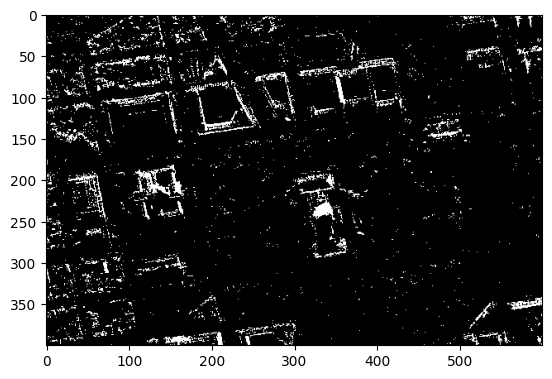

In [381]:
_, thresh_bin = cv2.threshold(image4_gray, 150, 255, cv2.THRESH_BINARY)
plt.imshow(thresh_bin, cmap='gray')
thresh_bin[thresh_bin==100].sum()

np.uint64(0)

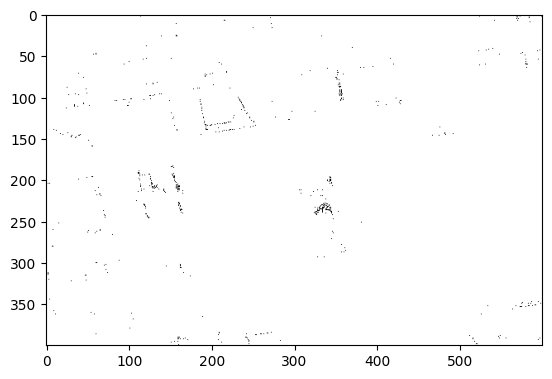

In [382]:
_, thresh_bin_inv = cv2.threshold(image4_gray, 250, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh_bin_inv, cmap='gray')
thresh_bin_inv[thresh_bin_inv==100].sum()

np.uint64(5728800)

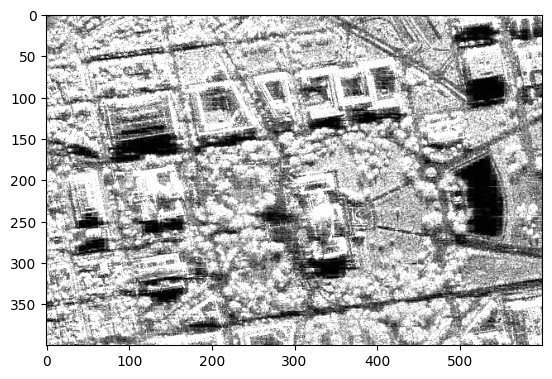

In [383]:
_, thresh_trunc = cv2.threshold(image4_gray, 100, 255, cv2.THRESH_TRUNC)
plt.imshow(thresh_trunc, cmap='gray')
thresh_trunc[thresh_trunc==100].sum()

np.uint64(0)

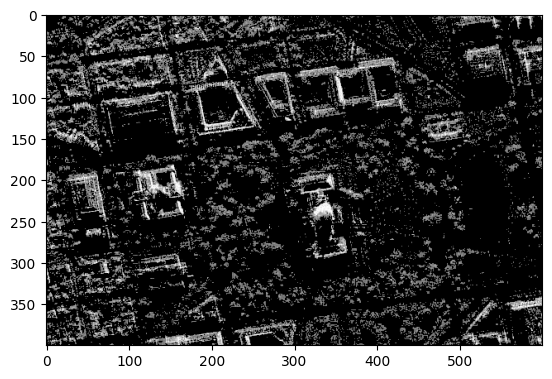

In [384]:
_, thresh_tozero = cv2.threshold(image4_gray, 100, 255, cv2.THRESH_TOZERO)
plt.imshow(thresh_tozero, cmap='gray')
thresh_tozero[thresh_tozero==100].sum()

=== РАСШИРЕННОЕ ТЕСТИРОВАНИЕ АЛГОРИТМОВ ПОРОГОВОЙ ФИЛЬТРАЦИИ ===

1. Тестирование THRESH_BINARY с различными пороговыми значениями:
   Порог 50: белых пикселей = 169178 (70.5%), черных пикселей = 70822 (29.5%)
   Порог 100: белых пикселей = 55653 (23.2%), черных пикселей = 184347 (76.8%)
   Порог 150: белых пикселей = 13083 (5.5%), черных пикселей = 226917 (94.5%)
   Порог 200: белых пикселей = 3830 (1.6%), черных пикселей = 236170 (98.4%)
   Порог 250: белых пикселей = 647 (0.3%), черных пикселей = 239353 (99.7%)


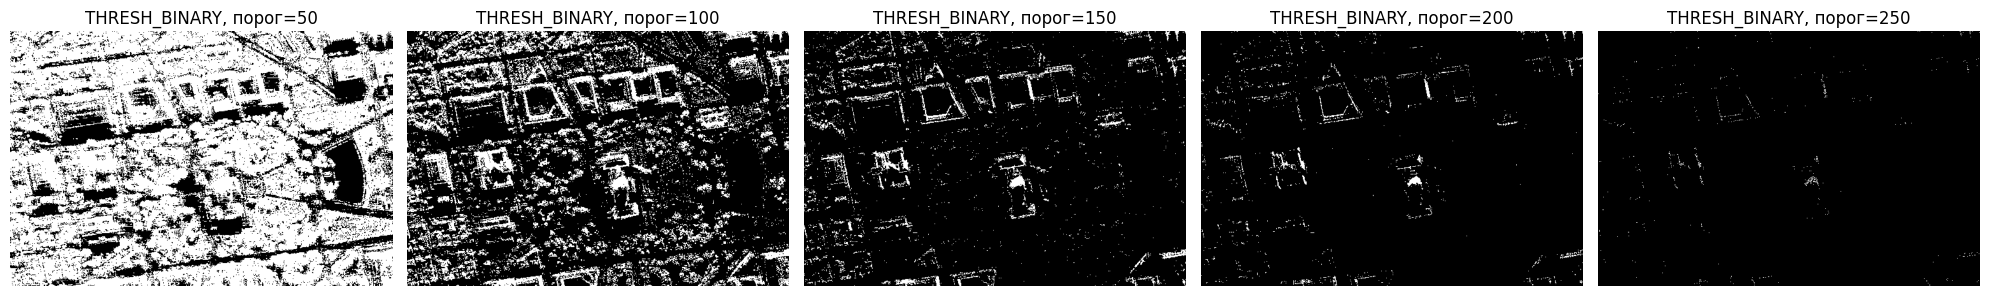


2. Сравнение всех типов пороговой фильтрации (порог=127):
   THRESH_BINARY: уникальные значения = [  0 255]
   THRESH_BINARY_INV: уникальные значения = [  0 255]
   THRESH_TRUNC: уникальные значения = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
   THRESH_TOZERO: уникальные значения = [  0 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 1

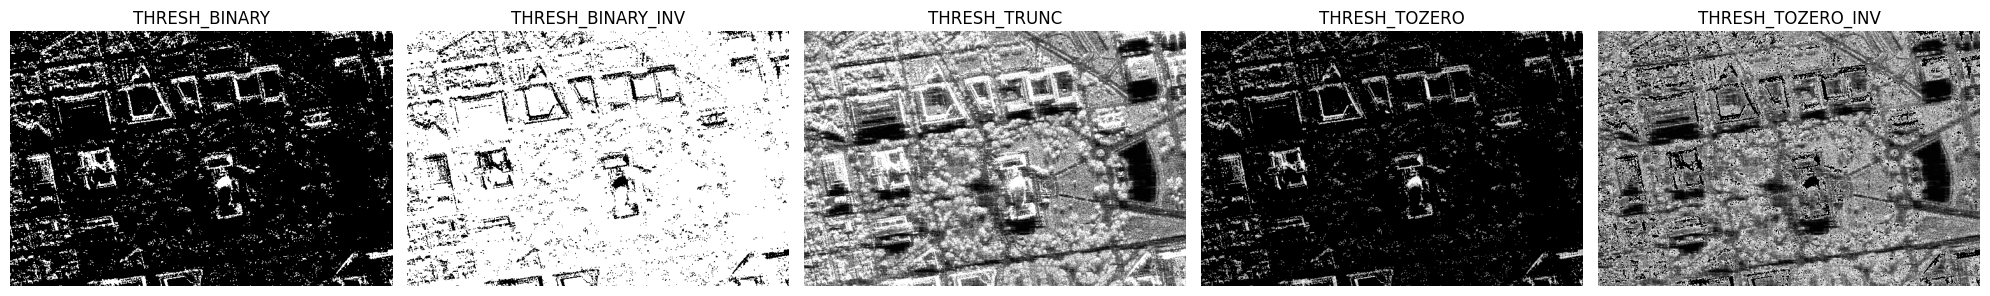


3. Адаптивная пороговая фильтрация:


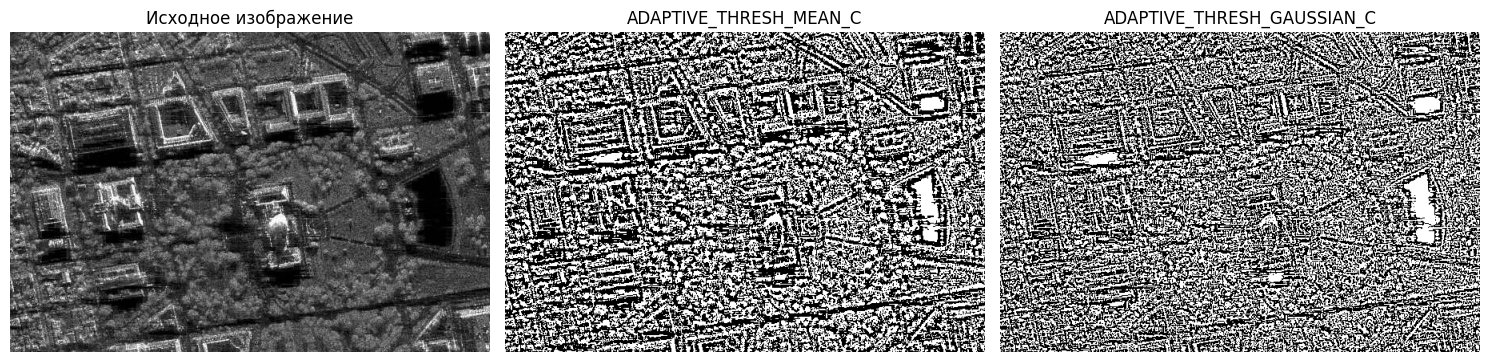

   ADAPTIVE_THRESH_MEAN_C: белых пикселей = 113124 (47.1%)
   ADAPTIVE_THRESH_GAUSSIAN_C: белых пикселей = 117779 (49.1%)

4. Otsu's метод автоматического выбора порога:


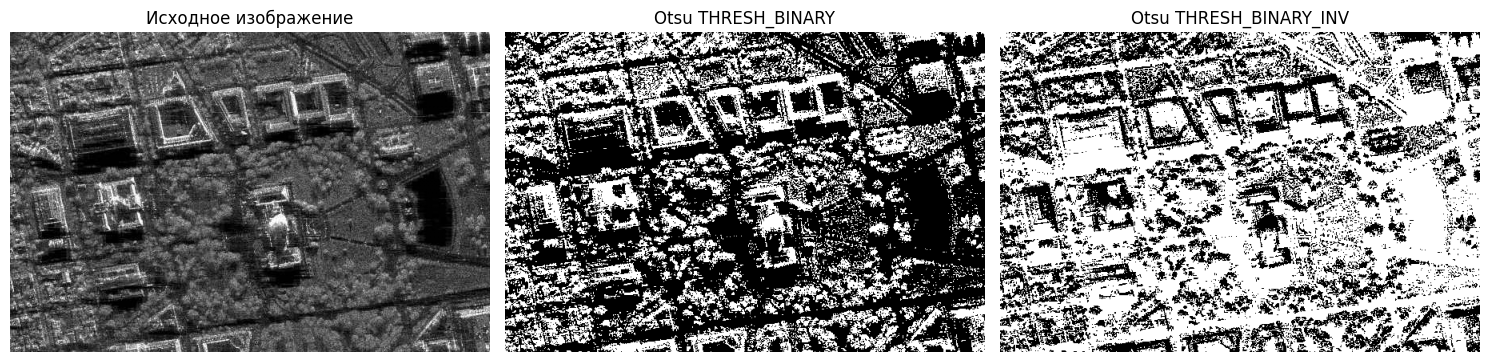

   Автоматически найденный порог Otsu: 85.00
   Otsu THRESH_BINARY: белых пикселей = 83989 (35.0%)

5. Тестирование различных параметров адаптивной фильтрации:
   Блок 3, C=2: белых пикселей = 130291 (54.3%)
   Блок 5, C=2: белых пикселей = 125574 (52.3%)
   Блок 11, C=2: белых пикселей = 117779 (49.1%)
   Блок 15, C=2: белых пикселей = 114883 (47.9%)
   Блок 21, C=2: белых пикселей = 112218 (46.8%)
   Блок 11, C=2: белых пикселей = 117779 (49.1%)
   Блок 11, C=5: белых пикселей = 133583 (55.7%)
   Блок 11, C=10: белых пикселей = 158109 (65.9%)
   Блок 11, C=15: белых пикселей = 179490 (74.8%)
   Блок 11, C=20: белых пикселей = 196912 (82.0%)


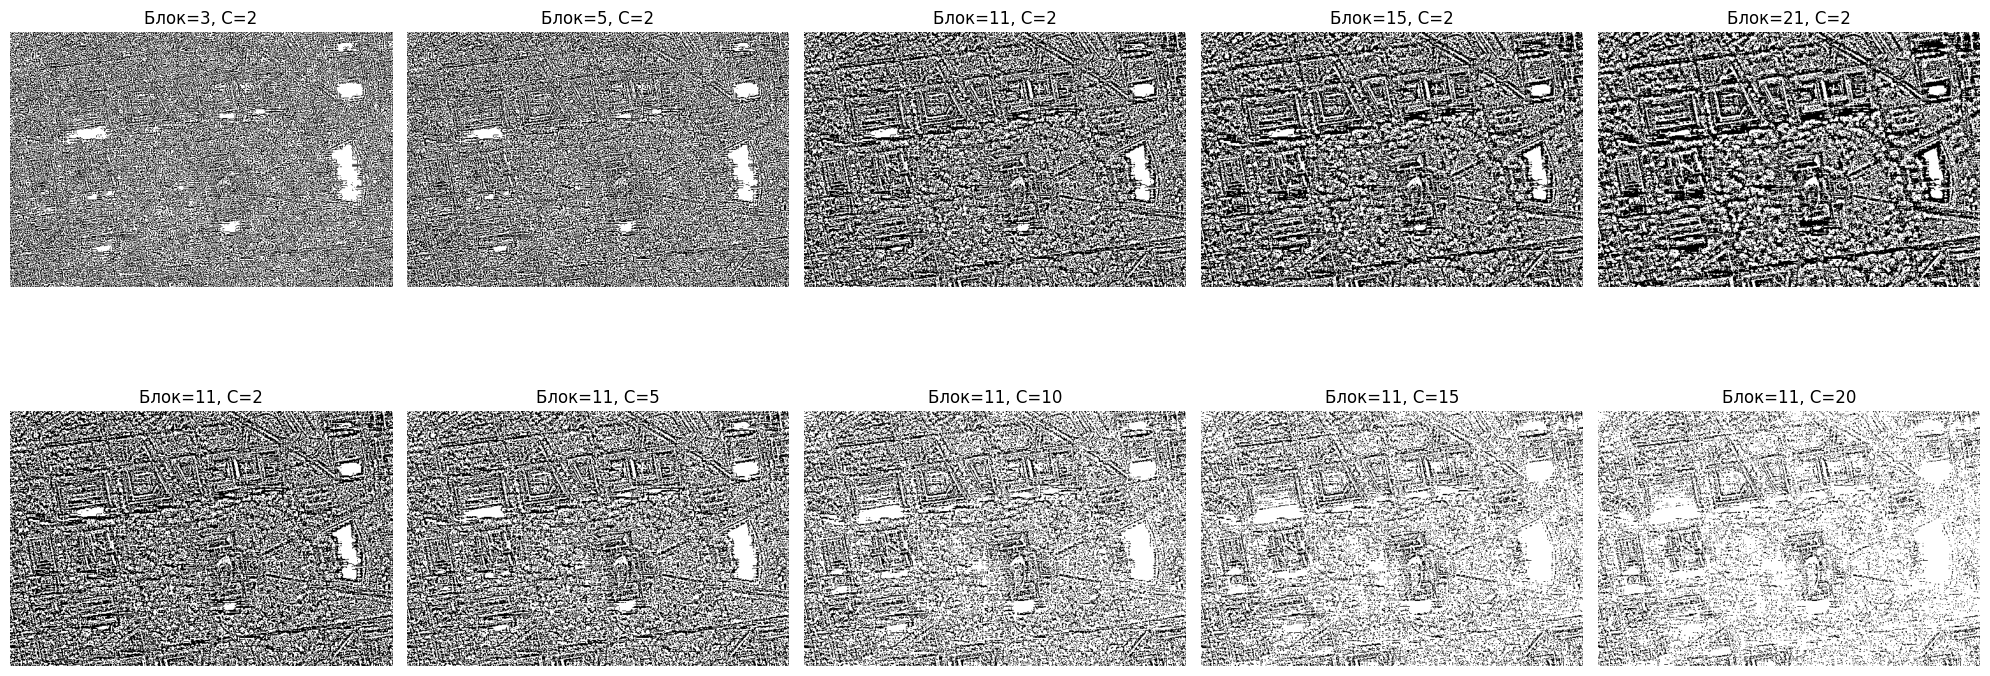


6. Сравнение эффективности методов пороговой фильтрации:
Метод                              | Белых пикселей | Черных пикселей | Уникальных значений
-------------------------------------------------------------------------------------
Ручной порог=127 (BINARY)           |         24992 |        215008 |                  2
Otsu (BINARY)                       |         83989 |        156011 |                  2
Otsu (BINARY_INV)                   |        156011 |         83989 |                  2
Адаптивный Mean                     |        113124 |        126876 |                  2
Адаптивный Gaussian                 |        117779 |        122221 |                  2

7. Анализ качества сегментации:
Ручной порог=127 (BINARY):
   Контрастность (белые/черные): 0.116
   Энтропия: 0.482

Otsu (BINARY):
   Контрастность (белые/черные): 0.538
   Энтропия: 0.934

Otsu (BINARY_INV):
   Контрастность (белые/черные): 1.858
   Энтропия: 0.934

Адаптивный Mean:
   Контрастность (белые/черные)

In [385]:
# Расширенное тестирование алгоритмов пороговой фильтрации

print("=== РАСШИРЕННОЕ ТЕСТИРОВАНИЕ АЛГОРИТМОВ ПОРОГОВОЙ ФИЛЬТРАЦИИ ===")
print()

# 1. Тестирование различных пороговых значений для THRESH_BINARY
print("1. Тестирование THRESH_BINARY с различными пороговыми значениями:")
thresholds = [50, 100, 150, 200, 250]

plt.figure(figsize=(20, 12))
for i, thresh_val in enumerate(thresholds):
    _, thresh_result = cv2.threshold(image4_gray, thresh_val, 255, cv2.THRESH_BINARY)
    
    plt.subplot(2, 5, i+1)
    plt.imshow(thresh_result, cmap='gray')
    plt.title(f'THRESH_BINARY, порог={thresh_val}')
    plt.axis('off')
    
    # Статистика
    white_pixels = np.sum(thresh_result == 255)
    black_pixels = np.sum(thresh_result == 0)
    total_pixels = thresh_result.shape[0] * thresh_result.shape[1]
    print(f"   Порог {thresh_val}: белых пикселей = {white_pixels} ({white_pixels/total_pixels*100:.1f}%), "
          f"черных пикселей = {black_pixels} ({black_pixels/total_pixels*100:.1f}%)")

plt.tight_layout()
plt.show()
print()

# 2. Сравнение всех типов пороговой фильтрации
print("2. Сравнение всех типов пороговой фильтрации (порог=127):")

threshold_methods = [
    (cv2.THRESH_BINARY, "THRESH_BINARY"),
    (cv2.THRESH_BINARY_INV, "THRESH_BINARY_INV"),
    (cv2.THRESH_TRUNC, "THRESH_TRUNC"),
    (cv2.THRESH_TOZERO, "THRESH_TOZERO"),
    (cv2.THRESH_TOZERO_INV, "THRESH_TOZERO_INV")
]

plt.figure(figsize=(20, 8))
for i, (method, name) in enumerate(threshold_methods):
    _, thresh_result = cv2.threshold(image4_gray, 127, 255, method)
    
    plt.subplot(2, 5, i+1)
    plt.imshow(thresh_result, cmap='gray')
    plt.title(name)
    plt.axis('off')
    
    # Статистика для каждого метода
    unique_values = np.unique(thresh_result)
    print(f"   {name}: уникальные значения = {unique_values}")

plt.tight_layout()
plt.show()
print()

# 3. Адаптивная пороговая фильтрация
print("3. Адаптивная пороговая фильтрация:")

# Mean Adaptive Thresholding
thresh_mean = cv2.adaptiveThreshold(image4_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                   cv2.THRESH_BINARY, 11, 2)

# Gaussian Adaptive Thresholding  
thresh_gaussian = cv2.adaptiveThreshold(image4_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                       cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image4_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(thresh_mean, cmap='gray')
plt.title('ADAPTIVE_THRESH_MEAN_C')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(thresh_gaussian, cmap='gray')
plt.title('ADAPTIVE_THRESH_GAUSSIAN_C')
plt.axis('off')

plt.tight_layout()
plt.show()

# Статистика адаптивных методов
mean_white = np.sum(thresh_mean == 255)
gaussian_white = np.sum(thresh_gaussian == 255)
total_pixels = thresh_mean.shape[0] * thresh_mean.shape[1]

print(f"   ADAPTIVE_THRESH_MEAN_C: белых пикселей = {mean_white} ({mean_white/total_pixels*100:.1f}%)")
print(f"   ADAPTIVE_THRESH_GAUSSIAN_C: белых пикселей = {gaussian_white} ({gaussian_white/total_pixels*100:.1f}%)")
print()

# 4. Otsu's метод автоматического выбора порога
print("4. Otsu's метод автоматического выбора порога:")

# Otsu's thresholding
_, thresh_otsu = cv2.threshold(image4_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu's thresholding с различными типами
_, thresh_otsu_inv = cv2.threshold(image4_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image4_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(thresh_otsu, cmap='gray')
plt.title('Otsu THRESH_BINARY')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(thresh_otsu_inv, cmap='gray')
plt.title('Otsu THRESH_BINARY_INV')
plt.axis('off')

plt.tight_layout()
plt.show()

# Выводим автоматически найденный порог
otsu_threshold = cv2.threshold(image4_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[0]
print(f"   Автоматически найденный порог Otsu: {otsu_threshold:.2f}")

otsu_white = np.sum(thresh_otsu == 255)
print(f"   Otsu THRESH_BINARY: белых пикселей = {otsu_white} ({otsu_white/total_pixels*100:.1f}%)")
print()

# 5. Тестирование адаптивных параметров
print("5. Тестирование различных параметров адаптивной фильтрации:")

block_sizes = [3, 5, 11, 15, 21]
C_values = [2, 5, 10, 15, 20]

plt.figure(figsize=(20, 12))

# Тестирование различных размеров блока (C=2)
for i, block_size in enumerate(block_sizes):
    thresh_adaptive = cv2.adaptiveThreshold(image4_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                           cv2.THRESH_BINARY, block_size, 2)
    
    plt.subplot(3, 5, i+1)
    plt.imshow(thresh_adaptive, cmap='gray')
    plt.title(f'Блок={block_size}, C=2')
    plt.axis('off')
    
    white_pixels = np.sum(thresh_adaptive == 255)
    print(f"   Блок {block_size}, C=2: белых пикселей = {white_pixels} ({white_pixels/total_pixels*100:.1f}%)")

# Тестирование различных значений C (блок=11)
for i, C in enumerate(C_values):
    thresh_adaptive = cv2.adaptiveThreshold(image4_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                           cv2.THRESH_BINARY, 11, C)
    
    plt.subplot(3, 5, i+6)
    plt.imshow(thresh_adaptive, cmap='gray')
    plt.title(f'Блок=11, C={C}')
    plt.axis('off')
    
    white_pixels = np.sum(thresh_adaptive == 255)
    print(f"   Блок 11, C={C}: белых пикселей = {white_pixels} ({white_pixels/total_pixels*100:.1f}%)")

plt.tight_layout()
plt.show()
print()

# 6. Сравнение эффективности методов
print("6. Сравнение эффективности методов пороговой фильтрации:")

# Список всех методов для сравнения
all_methods = [
    ("Ручной порог=127 (BINARY)", cv2.threshold(image4_gray, 127, 255, cv2.THRESH_BINARY)[1]),
    ("Otsu (BINARY)", thresh_otsu),
    ("Otsu (BINARY_INV)", thresh_otsu_inv),
    ("Адаптивный Mean", thresh_mean),
    ("Адаптивный Gaussian", thresh_gaussian),
]

print("Метод                              | Белых пикселей | Черных пикселей | Уникальных значений")
print("-" * 85)

for method_name, result in all_methods:
    white_pixels = np.sum(result == 255)
    black_pixels = np.sum(result == 0)
    unique_count = len(np.unique(result))
    
    print(f"{method_name:<35} | {white_pixels:>13} | {black_pixels:>13} | {unique_count:>18}")

print()

# 7. Анализ качества сегментации
print("7. Анализ качества сегментации:")

# Вычисляем контрастность для каждого метода
for method_name, result in all_methods:
    # Вычисляем контрастность как отношение белых к черным пикселям
    white_pixels = np.sum(result == 255)
    black_pixels = np.sum(result == 0)
    
    if black_pixels > 0:
        contrast_ratio = white_pixels / black_pixels
    else:
        contrast_ratio = float('inf')
    
    # Вычисляем энтропию (мера информативности)
    hist = cv2.calcHist([result], [0], None, [256], [0, 256])
    hist_norm = hist / (result.shape[0] * result.shape[1])
    entropy = -np.sum(hist_norm * np.log2(hist_norm + 1e-10))
    
    print(f"{method_name}:")
    print(f"   Контрастность (белые/черные): {contrast_ratio:.3f}")
    print(f"   Энтропия: {entropy:.3f}")
    print()

print("=== ЗАВЕРШЕНИЕ ТЕСТИРОВАНИЯ АЛГОРИТМОВ ПОРОГОВОЙ ФИЛЬТРАЦИИ ===")


np.uint64(163500)

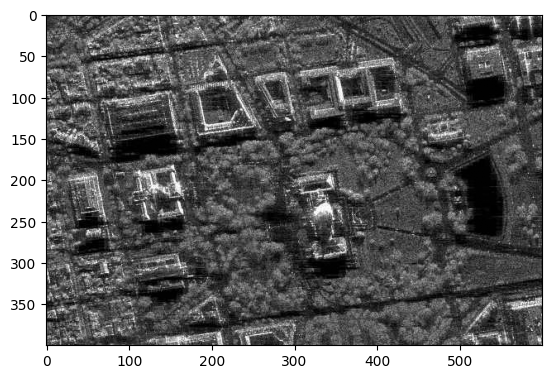

In [386]:
_, thresh_tozero_inv = cv2.threshold(image4_gray, 400, 255, cv2.THRESH_TOZERO_INV)
plt.imshow(thresh_tozero_inv, cmap='gray')
thresh_tozero_inv[thresh_tozero_inv==100].sum()